In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [8]:
data=pd.read_csv('/content/drive/MyDrive/Trip Advisor review dataset.csv')
data.head()

,Unnamed: 0,Rating,Review
0,0,2,Been going to Dr. Goldberg for over 10 years. ...
1,1,1,I don't know what Dr. Goldberg was like before...
2,2,1,I'm writing this review to give you a heads up...
3,3,2,All the food is great here. But the best thing...
4,4,1,Wing sauce is like water. Pretty much a lot of...


In [9]:
import pandas as pd

# Assuming 'data' is your DataFrame
data['Unnamed: 0'] = pd.Categorical(data['Unnamed: 0'])
# Instead of converting the entire 'Rating' column, convert the first element of each list
# This assumes the first element represents the actual rating
data['Rating'] = pd.Categorical(data['Rating'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x))

# Verify the changes
data.info()  # Check the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  40000 non-null  category
 1   Rating      40000 non-null  category
 2   Review      40000 non-null  object  
dtypes: category(2), object(1)
memory usage: 1.8+ MB


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  40000 non-null  category
 1   Rating      40000 non-null  category
 2   Review      40000 non-null  object  
dtypes: category(2), object(1)
memory usage: 1.8+ MB


In [11]:
data.isnull().sum()

,0
Unnamed: 0,0
Rating,0
Review,0


In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [14]:
from nltk.tokenize import word_tokenize
data['Review']=data['Review'].astype(str)
data['Review']=data['Review'].apply(word_tokenize)
data.head()

,Unnamed: 0,Rating,Review
0,0,2,"[Been, going, to, Dr., Goldberg, for, over, 10..."
1,1,1,"[I, do, n't, know, what, Dr., Goldberg, was, l..."
2,2,1,"[I, 'm, writing, this, review, to, give, you, ..."
3,3,2,"[All, the, food, is, great, here, ., But, the,..."
4,4,1,"[Wing, sauce, is, like, water, ., Pretty, much..."


In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
  return [word for word in tokens if word.lower() not in stop_words]
  data['Review'] = data['Review'].apply(remove_stopwords)

In [17]:
from nltk.stem import PorterStemmer # For stemming
 # Stemming
stemmer = PorterStemmer()
def stem_tokens(tokens):
  return [stemmer.stem(word) for word in tokens]
  data['Review'] = data['Review'].apply(stem_tokens)

In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
from nltk.stem import WordNetLemmatizer # For Lemmatization
# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
  return [lemmatizer.lemmatize(word) for word in tokens]
  data['Review']=data['Review'].apply(lemmatize_tokens)

In [20]:
import nltk
nltk.download('averaged_perception_tagger')

[nltk_data] Error loading averaged_perception_tagger: Package
[nltk_data]     'averaged_perception_tagger' not found in index


False

In [21]:
def pos_tag_tokens(tokens):
  return nltk.pos_tag(tokens)
  data['Review']=data['Review'].apply(pos_tag_tokens)
  return data

In [22]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [23]:
def nltk_ner(tokens):
  return nltk.ne_chunk(tokens)
  data['Review']=data['Review'].apply(nltk_ner)
  return data

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
data['Review'] = data['Review'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
vectorizer.fit(data['Review'])
vectorized_data=vectorizer.transform(data['Rating'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x)))
print(vectorizer.vocabulary_)


{'been': 5332, 'going': 20253, 'to': 49922, 'dr': 14844, 'goldberg': 20262, 'for': 18606, 'over': 36029, '10': 56, 'years': 54750, 'think': 49510, 'was': 53396, 'one': 35527, 'of': 35312, 'his': 22161, '1st': 456, 'patients': 36901, 'when': 53824, 'he': 21653, 'started': 47070, 'at': 4111, 'mhmg': 28889, 'great': 20638, 'the': 49377, 'and': 3111, 'is': 24362, 'really': 40518, 'all': 2705, 'about': 1708, 'big': 5759, 'picture': 37742, 'it': 24408, 'because': 5271, 'him': 22108, 'not': 33473, 'my': 30230, 'now': 33585, 'former': 18712, 'gyn': 21092, 'markoff': 28054, 'that': 49366, 'found': 18775, 'out': 35917, 'have': 21585, 'fibroids': 17781, 'explores': 17032, 'options': 35695, 'with': 54204, 'you': 54878, 'very': 52727, 'patient': 36899, 'understanding': 51568, 'does': 14528, 'judge': 24990, 'asks': 3970, 'right': 42138, 'questions': 40002, 'thorough': 49558, 'wants': 53334, 'be': 5183, 'kept': 25338, 'in': 23365, 'loop': 27072, 'on': 35520, 'every': 16658, 'aspect': 3978, 'your': 54

In [25]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(vectorized_data)
pca.components_


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
vectorizer.fit(data['Review'])
vectorized_data=vectorizer.transform(data['Review'])
print(vectorizer.vocabulary_)

{'been': 5332, 'going': 20253, 'to': 49922, 'dr': 14844, 'goldberg': 20262, 'for': 18606, 'over': 36029, '10': 56, 'years': 54750, 'think': 49510, 'was': 53396, 'one': 35527, 'of': 35312, 'his': 22161, '1st': 456, 'patients': 36901, 'when': 53824, 'he': 21653, 'started': 47070, 'at': 4111, 'mhmg': 28889, 'great': 20638, 'the': 49377, 'and': 3111, 'is': 24362, 'really': 40518, 'all': 2705, 'about': 1708, 'big': 5759, 'picture': 37742, 'it': 24408, 'because': 5271, 'him': 22108, 'not': 33473, 'my': 30230, 'now': 33585, 'former': 18712, 'gyn': 21092, 'markoff': 28054, 'that': 49366, 'found': 18775, 'out': 35917, 'have': 21585, 'fibroids': 17781, 'explores': 17032, 'options': 35695, 'with': 54204, 'you': 54878, 'very': 52727, 'patient': 36899, 'understanding': 51568, 'does': 14528, 'judge': 24990, 'asks': 3970, 'right': 42138, 'questions': 40002, 'thorough': 49558, 'wants': 53334, 'be': 5183, 'kept': 25338, 'in': 23365, 'loop': 27072, 'on': 35520, 'every': 16658, 'aspect': 3978, 'your': 54

In [27]:
!pip install textblob

In [28]:
from textblob import TextBlob
def get_sentiment(text):
  analysis=TextBlob(text)
  if analysis.sentiment.polarity > 0:
    return 'positive'
  elif analysis.sentiment.polarity < 0:
    return 'negative'
  else:
    return 'neutral'
    data['Sentiment']=data['Review'].apply(get_sentiment)
    return data

In [29]:
data.head()

,Unnamed: 0,Rating,Review
0,0,2,Been going to Dr. Goldberg for over 10 years ....
1,1,1,I do n't know what Dr. Goldberg was like befor...
2,2,1,I 'm writing this review to give you a heads u...
3,3,2,All the food is great here . But the best thin...
4,4,1,Wing sauce is like water . Pretty much a lot o...


In [30]:
!pip install Transformers

In [31]:
from transformers import pipeline
sentiment_analysis=pipeline('sentiment-analysis')
def analyze_sentiment(text):
  sentiment=sentiment_analysis(text)[0]
  return sentiment['label']
  data['Sentiment']=data['Review'].apply(lambda x: sentiment_analysis(x) if isinstance(x, str) else None)
data.head()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


,Unnamed: 0,Rating,Review
0,0,2,Been going to Dr. Goldberg for over 10 years ....
1,1,1,I do n't know what Dr. Goldberg was like befor...
2,2,1,I 'm writing this review to give you a heads u...
3,3,2,All the food is great here . But the best thin...
4,4,1,Wing sauce is like water . Pretty much a lot o...


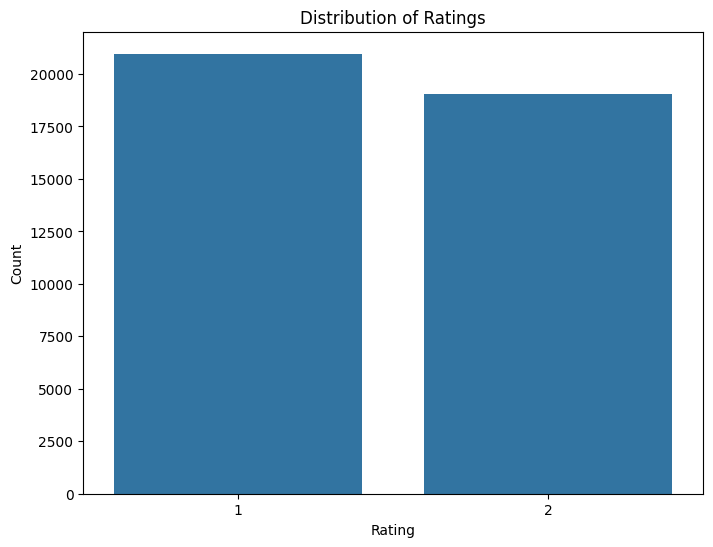

In [32]:
# Implimenting Bar Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of Rating distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [33]:
!pip install wordcloud

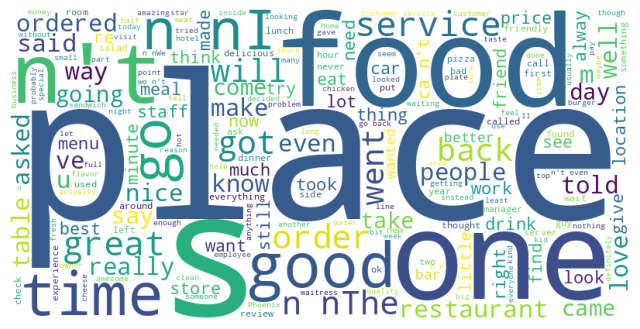

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text= ' '.join(data['Review'])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [35]:
!pip install gensim

In [36]:
# Implimenting word2vec using  gensim
import gensim
# Assuming 'data' is your DataFrame and 'Review' is the column containing text data
sentences = data['Review'].apply(lambda x: x.split() if isinstance(x, str) else x).tolist() # Convert reviews to list of words

# Create a Word2Vec model
model = gensim.models.Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

# Get the word vector for a specific word
vector = model.wv['hotel']
# Print the vector
print(vector)

# Save the model
model.save("word2vec.model")

[ 1.0193     -0.18007824 -0.49470577 -0.86054844 -1.9181608   0.5146086
 -0.23015794  2.0450442  -0.31324938 -1.5893514   0.94481736 -0.38811833
 -0.634158    0.24700247  0.20956028  1.1873957   0.09212355  0.51820546
  1.3589658  -2.5465224  -1.036831   -0.53997225 -1.3765955   0.50650704
 -0.6949768  -0.26809907  1.8304394  -2.329403   -0.07712042  0.49958286
 -1.1505458   1.3889763   1.8515146  -1.562228   -2.2422209   0.82894456
 -0.14786538 -0.42836645 -0.11278789  0.80511117 -1.3423172  -0.48609307
  1.078301   -2.0469756  -0.71050435 -1.5108888   1.1233493   1.9298567
 -0.3318955   1.5834984  -1.466937    0.10601342 -1.0022458   2.026662
  0.45107847 -0.19989046  1.6994057  -0.50267744  2.9724317   1.4597065
 -0.86163265 -0.67373127 -1.2548501  -1.8748318   0.80098766 -1.0614346
 -0.88334924 -2.193856   -1.3205309  -1.8605826   1.6100355  -0.45127657
  1.0506499   1.2639023   2.2904236   0.7093692  -0.41261902  1.0547056
  0.89906263  0.62939984  0.5828406  -1.2527514   0.662523

In [37]:
# Implimenting logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Prepare data
X = vectorized_data
# Instead of directly converting to int, extract the first element (assuming it's the rating)
y = data['Rating'].apply(lambda x: int(x[0]) if isinstance(x, list) and len(x) > 0 else int(x))


# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Make predictions on the testing set
y_pred_log = model.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_log))

Accuracy: 0.917375
              precision    recall  f1-score   support

           1       0.91      0.93      0.92      4187
           2       0.92      0.90      0.91      3813

    accuracy                           0.92      8000
   macro avg       0.92      0.92      0.92      8000
weighted avg       0.92      0.92      0.92      8000



In [38]:
# Implementing Random forest algorithm on the given dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'vectorized_data' is TF-IDF DataFrame and 'data' is your original DataFrame
# 'Rating' is assumed to be the target variable column in 'data'

# 1. Prepare data
X = vectorized_data
# Extract the first element of 'Rating' and convert to integers (handling potential lists)
y = data['Rating'].apply(lambda x: int(x[0]) if isinstance(x, list) and len(x) > 0 else int(x))

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters
model.fit(X_train, y_train)

# 4. Make predictions on the testing set
y_pred_RF = model.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred_RF)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_RF))

Accuracy: 0.86125
              precision    recall  f1-score   support

           1       0.84      0.91      0.87      4187
           2       0.90      0.80      0.85      3813

    accuracy                           0.86      8000
   macro avg       0.87      0.86      0.86      8000
weighted avg       0.86      0.86      0.86      8000



In [39]:
!pip install Xgboost

In [40]:
# Implementing Xg boost classifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'vectorized_data' is TF-IDF DataFrame and 'data' is your original DataFrame
# 'Rating' is assumed to be the target variable column in 'data'

# 1. Prepare data
X = vectorized_data  # TF-IDF vectors as features
# Extract the first element of 'Rating' and convert to integers (handling potential lists)
y = pd.to_numeric(data['Rating'].apply(lambda x: int(x[0]) if isinstance(x, list) and len(x) > 0 else x), errors='coerce')- 1

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the XGBoost model
model = XGBClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters
model.fit(X_train, y_train)

# 4. Make predictions on the testing set
y_pred_xgb = model.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.88975
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4187
           1       0.90      0.87      0.88      3813

    accuracy                           0.89      8000
   macro avg       0.89      0.89      0.89      8000
weighted avg       0.89      0.89      0.89      8000



In [41]:
#Implimenting Naive Bayes Algorithm on  the given dataset
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'vectorized_data' is TF-IDF DataFrame and 'data' is your original DataFrame
# 'Rating' is assumed to be the target variable column in 'data'

# 1. Prepare data
X = vectorized_data  # TF-IDF vectors as features
y = data['Rating'].apply(lambda x: int(x[0]) if isinstance(x, list) and len(x) > 0 else int(x)).astype(int)
if any(val not in (0, 1) for val in y.unique()):
    y = y - 1

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the Multinomial Naive Bayes model
model = MultinomialNB()  # You can adjust hyperparameters
model.fit(X_train, y_train)

# 4. Make predictions on the testing set
y_pred_NB = model.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred_NB)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_NB))

Accuracy: 0.86725
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4187
           1       0.92      0.79      0.85      3813

    accuracy                           0.87      8000
   macro avg       0.87      0.86      0.87      8000
weighted avg       0.87      0.87      0.87      8000



In [42]:
!pip install scikit-learn --upgrade

In [43]:
# Implimenting Support Vector Machine algorithm on the given dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [44]:
X = vectorized_data
y = data['Rating'].apply(lambda x: int(x[0]) if isinstance(x, list) and len(x) > 0 else int(x))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
base_estimator = SVC(kernel='linear')  # You can choose other kernels like 'rbf', 'poly'
model.fit(X_train, y_train)

MultinomialNB()

In [46]:
y_pred_SVC = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_SVC)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_SVC))

Accuracy: 0.86725
              precision    recall  f1-score   support

           1       0.83      0.93      0.88      4187
           2       0.92      0.79      0.85      3813

    accuracy                           0.87      8000
   macro avg       0.87      0.86      0.87      8000
weighted avg       0.87      0.87      0.87      8000



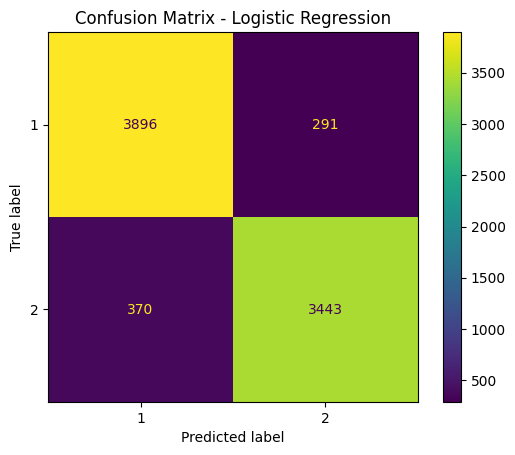

In [47]:
# Confusion matrix for the logistic regression algorithm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_log)  # Replace y_pred_lr with predictions from Logistic Regression
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=model.classes_)
disp_lr.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

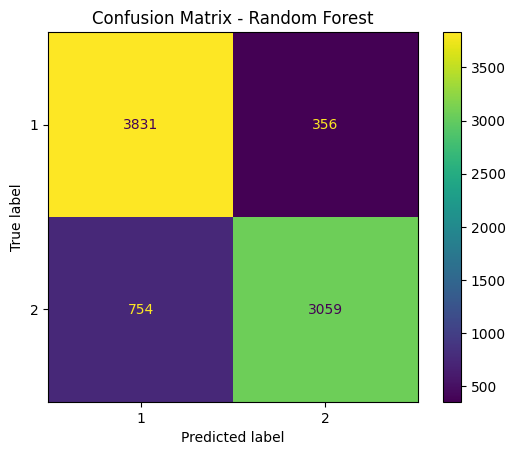

In [48]:
#Confusion matrix for the Random Forest algorithm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_rf = confusion_matrix(y_test, y_pred_RF)  # Replace y_pred_rf with predictions from Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model.classes_)
disp_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

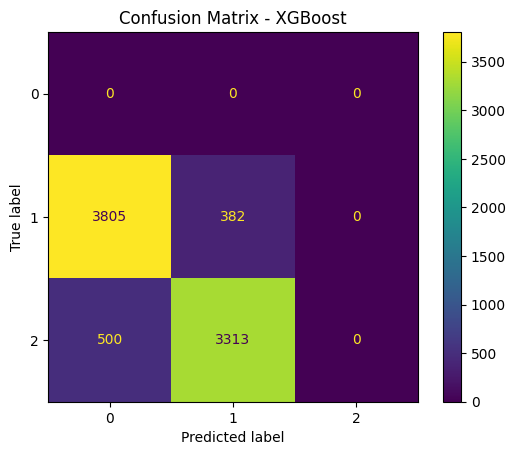

In [49]:
#Confusion matrix for the Xg boost algorithm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)  # Replace y_pred_xgb with predictions from XGBoost
# Get the unique class labels from the XGBoost model's predictions
labels = np.unique(np.concatenate((y_test, y_pred_xgb)))
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=labels)  # Use labels instead of model.classes_
disp_xgb.plot()
plt.title("Confusion Matrix - XGBoost")
plt.show()

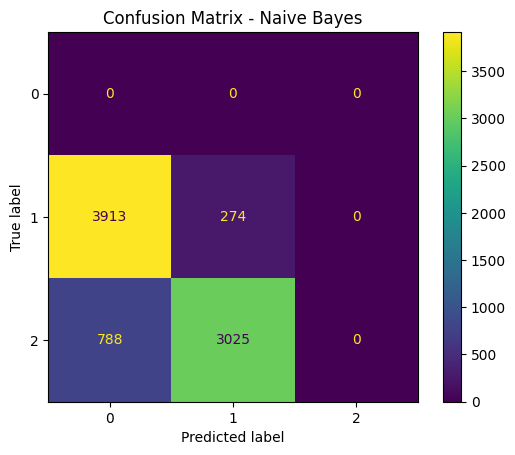

In [50]:
#Confusion matrix for the Naive Bayes algorithm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_NB)  # Replace y_pred_nb with predictions from Naive Bayes
# Get unique labels from y_test and y_pred_NB
labels = np.unique(np.concatenate((y_test, y_pred_NB)))
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=labels) # Use unique labels
disp_nb.plot()
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

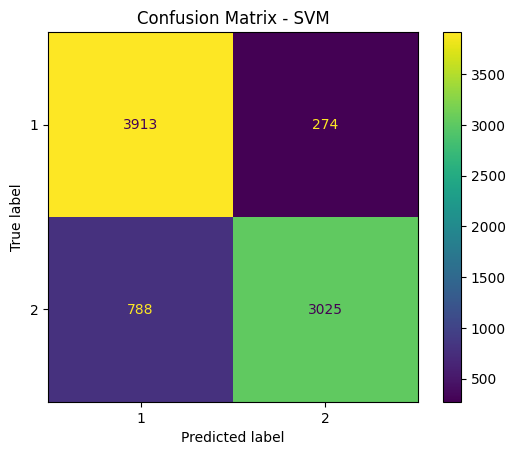

In [51]:
#Confusion Matrix for the Support vector machine algorithm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#SVM
cm_svm = confusion_matrix(y_test, y_pred_SVC)  # Replace y_pred_svm with predictions from SVM
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=model.classes_)
disp_svm.plot()
plt.title("Confusion Matrix - SVM")
plt.show()


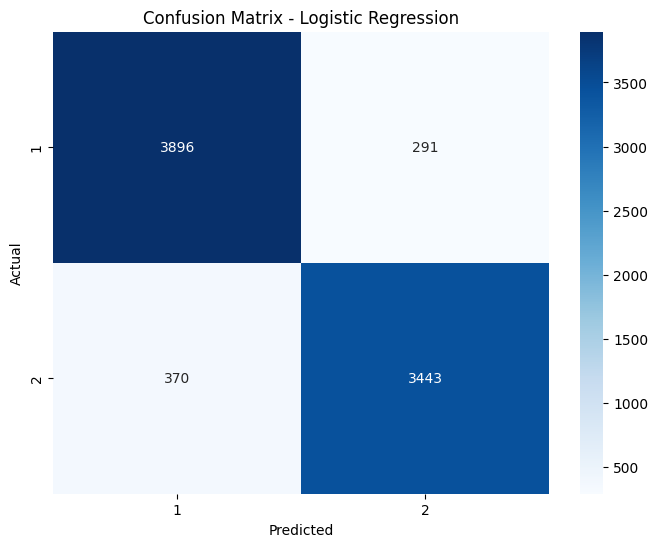

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'y_test' and 'y_pred_log' are your true and predicted labels respectively
# for the Logistic Regression model. Replace with your actual variables.

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_log)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

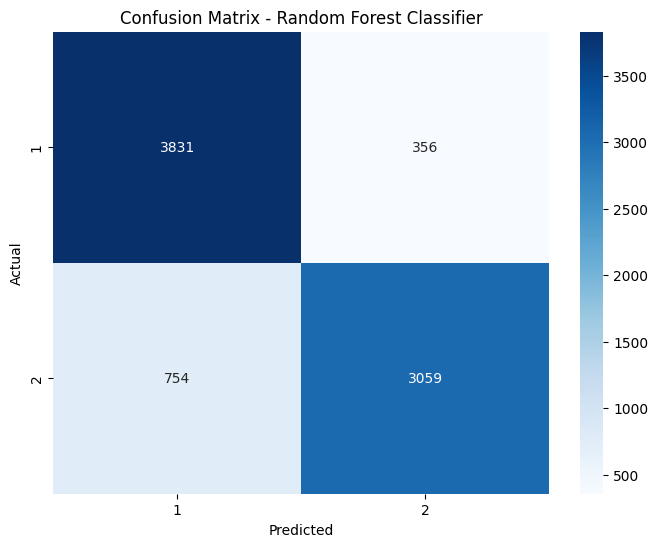

In [53]:
# Assuming 'y_test' and 'y_pred_log' are your true and predicted labels respectively
# for the Random forest model. Replace with your actual variables.

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_RF)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

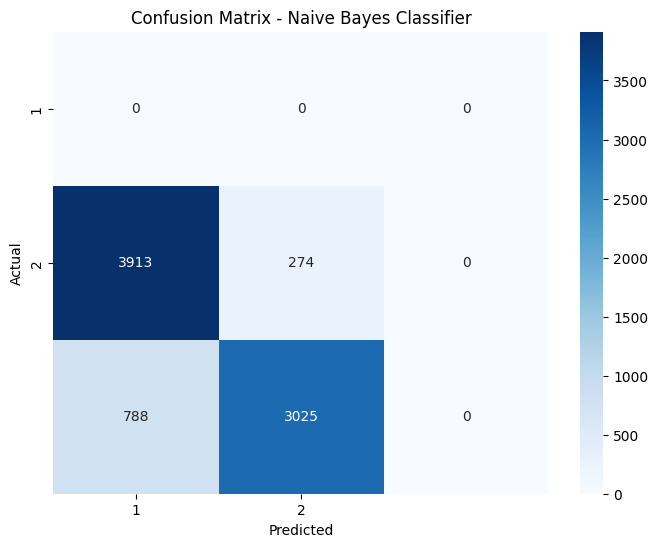

In [54]:
# Assuming 'y_test' and 'y_pred_log' are your true and predicted labels respectively
# for the Naive Bayes Classifier model. Replace with your actual variables.

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_NB)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes Classifier")
plt.show()

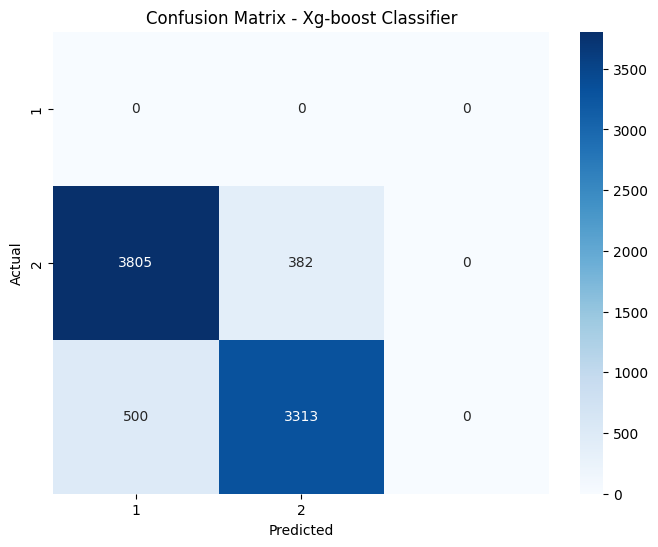

In [55]:
# Assuming 'y_test' and 'y_pred_log' are your true and predicted labels respectively
# for the Xg boost classifier model. Replace with your actual variables.

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Xg-boost Classifier")
plt.show()

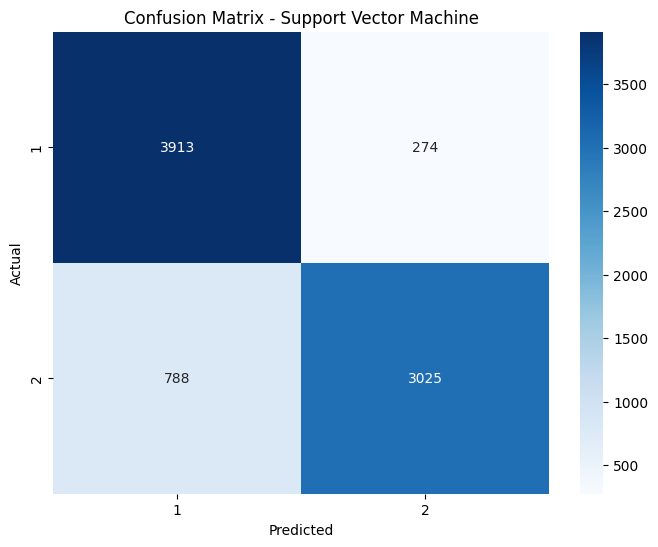

In [56]:
# Assuming 'y_test' and 'y_pred_log' are your true and predicted labels respectively
# for the Support Vector Machine model. Replace with your actual variables.

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_SVC)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()

In [57]:
import pandas as pd


models = ['Logistic Regression', 'Xg boost', 'Random Forest', 'Naive Bayes', 'SVM']
accuracies = [0.91, 0.88, 0.86125, 0.86725, 0.86725]

results = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies

})

# Saving the results to a CSV file
results.to_csv('model_results.csv', index=False)

# Display the results
print(results.to_string(index=False))

              Model  Accuracy
Logistic Regression   0.91000
           Xg boost   0.88000
      Random Forest   0.86125
        Naive Bayes   0.86725
                SVM   0.86725
